In [103]:
%%capture
# Install the autograder to check your answers as you go along
import sys
!{sys.executable} -m pip install otter-grader
# Initialize Otter 
import otter
grader = otter.Notebook("group_activity8.ipynb")

# In-class coding exercise #8
Objective: In this exercise you will review using Pandas Dataframes and plotting. Additionally, you will practice using SciPy's linear regression.

## Introduction to group coding exercises
Today you’ll work on this exercise in the same groups of 3-4 you were assigned last week, submitting a single notebook file at the end of the class period. Decide amongst yourselves which member will upload the completed notebook to Gradescope this week. Make sure that everyone takes a turn being the “Uploader”. _You cannot upload the final code two weeks in a row._

Designate a different group member to be the "Reporter". The Reporter will be in charge of participating in the group discussion at the end of the class session.

### Workflow
Each question will be timed to ensure that everyone gets to work on at least a part of every question. Group activities are not graded by completeness or correctness, but by effort. We will be breaking down each question in the following order:  
1. Independent work 
2. Group work and discussion on coding question
3. Group work and discussion on reflection questions

You are welcome and encouraged to communicate with other groups and the teaching team when you feel stuck on a problem. 

As a reminder, we will be grading based best practices in coding. These include: 
1) Variables are used to store objects

2) Code is commented adequately

3) Variables are names appropriately

4) Code is efficient with minimal unnecessary lines 

5) Documenting help from outside sources, such as from other groups or online documentation. 

6) Final notebook fully runs from start to finish. A good way to check this is restarting the kernel and fully running through all the cells to check for any errors.

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary, you can also store your answer directly in the answer variables.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

## Note here **and in the Gradescope submission** each of your group members:
1.
2. 
3.

# Question 1: Global temperature concentrations

The figure below shows CO2 concentration over the past three centuries. We will compare this trend in CO2 with measured global temperature anomalies stored in "NASA_GISS_global_temp.csv" aquired from 
[NASA's Goddard Institute for Space Studies](https://data.giss.nasa.gov/gistemp/). Today you will read this data using Pandas, plot it, and model it using SciPy's linear regression.

<img src="https://i.ibb.co/Hz4rMtc/co2-photo.png" width="700" />

*Image: Atmospheric CO2 from 1700 to 2020. Source: [Scripps/UCSD](https://keelingcurve.ucsd.edu/).*


## Part 1: Plot initial data (20 minutes)
1) Set your `filepath` variable to the string representation to the "NASA_GISS_global_temp.csv" in the "data" folder. 
Load the file as a DataFrame using Pandas into the `global_temp` variable. Using the "index_col" argument, set the "Year" column as your DataFrame indexes to load years as integers.

2) Make a plot of the 1880-2019 time series for Temperature Anomaly. Set the year (now the index) in the x-axis, and the "Temp_anomaly" column in the y-axis. Include the following:

>a) Markers for each data point

>b) Grid

>c) All required plot elements listed in Assignment Instructions

,Temp_anomaly,Temp_anomaly_smooth
Year,,
1880,-0.16,-0.08
1881,-0.07,-0.12
1882,-0.10,-0.16
1883,-0.16,-0.19
1884,-0.27,-0.23
...,...,...
2015,0.90,0.83
2016,1.01,0.87
2017,0.92,0.91


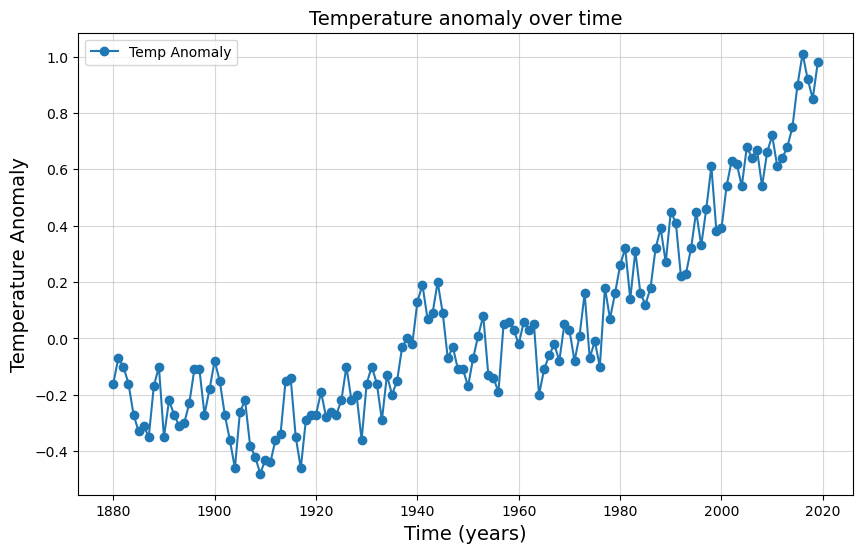

In [101]:
# Import NumPy, Pandas, SciPy, Matplotlib
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# your code

# answer variables
filepath = "data/NASA_GISS_global_temp.csv" # assigning file path
global_temp = pd.read_csv(filepath,
                          index_col = "Year") # opening file using pandas
display(global_temp) # displaying dataset so I can figure out what column headers are called

# create plot 
fig, ax = plt.subplots(figsize = (10,6)) # adding blank plot to put data on
ax.plot(global_temp.index, global_temp["Temp_anomaly"], marker = "o", label = "Temp Anomaly") # plotting the temp anomaly data over time
ax.grid(alpha = 0.5) # setting the grid
ax.set_xlabel("Time (years)", fontsize = 14) # setting the x-axis label
ax.set_ylabel("Temperature Anomaly", fontsize = 14) # setting the y-axis label
ax.set_title("Temperature anomaly over time", fontsize = 14) # setting the title
ax.legend() # turning on the legend

In [30]:
grader.check("Question 1, Part 1")

Question 1, Part 1 results: All test cases passed!

## Part 2: Design linear regression model (25 minutes)
3) Use the scipy.stats `linregress()` function to calculate a linear regression on the entire 1880-2019 time series. Do this in one line of code and store the output in the `slope`, `intercept`, `rvalue`, `pvalue`, and `stderr` variables. **Hint: years (index) are the x values, and Temp_anomalys are the y values (slide 11-12 in prelectures).** (0.5 point)

4) Calculate linear regression fit: (1 point)
>1) Print the slope (including units), **r-squared value** (`rvalue` squared), and p-value rounded to 3 decimal places.
>2) Store the years (index) from `global_temp` in the `x_values` variable.
>3) Use the `slope`, `intercept`, and your `x_values` to calculate the linear regression fit*. Store the resulting array in the `y_values` variable. 

*_HINT: Linear Regression follows the formula below_
> **y = mx+b**

5) Plot your linear regression fit and compare against the original data: (0.5 point):
>1) Copy and paste your code to plot the temperature anomaly time series from part 1. 
>2) Plot the regression line that you just calculated on top using **different line type and color than the default settings**. 
>3) Add a legend (make sure to use the "label" argument in the `plot()` function).

Slope is: 0.007 , r-squared is: 0.75 , p-value is: 0.0


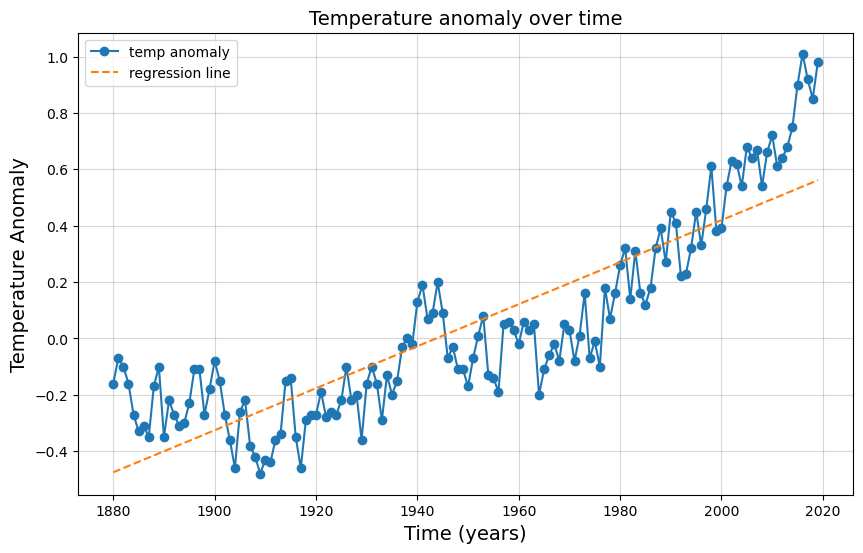

In [78]:
# your code
print("Slope is:", round(slope,3),
     ", r-squared is:", (rvalue**2).round(3),
     ", p-value is:", round(pvalue,3)) # printing out the values asked for, using round() function to round to 3 decimal places
temp_fit = x_values*slope + intercept # setting equation for line of best fit (in y = mx + b form)

# answer variables
slope, intercept, rvalue, pvalue, stderr = stats.linregress(global_temp.index, global_temp["Temp_anomaly"]) # performing statistical analysis
x_values = global_temp.index # setting x values for the linear regression line
y_values = temp_fit # setting y values for linear regression line

# copy and paste plot from part 1 and add line for linear regression fit
fig, ax = plt.subplots(figsize = (10,6)) # making another blank plot, same structure as above but with the linear regression line plotted as well
ax.plot(global_temp.index, global_temp["Temp_anomaly"], marker = "o", label = "temp anomaly") # above
ax.grid(alpha = 0.5) # above
ax.set_xlabel("Time (years)", fontsize = 14) # above
ax.set_ylabel("Temperature Anomaly", fontsize = 14) # above
ax.set_title("Temperature anomaly over time", fontsize = 14) # above
ax.plot(x_values, y_values, "--", label = "regression line") # plotting the linear regression line - used a dashed line so it is visibly distinct
ax.legend() # above

In [79]:
grader.check("Question 1, Part 2")

Question 1, Part 2 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Data Interpretation (10 minutes)
6) Answer the following questions in a text box (reference SciPy lecture slides if needed):

>a. How much variance in the data is explained by the regression? _HINT: calculate r^2 value to get the variance, check slide 13 on how to get r^2 from the rvalue_

>b. Looking at the p-value, is the 1880-2019 trend significant at the 95% confidence level? How can you tell?

>c. Is this linear regression appropriate for this data? Why or why not? (2-3 sentences)


a) The r-squared value is about 75%, which means that 75% of the variance is explained by this regression.

b) My p-value has much less than 0.05, meaning my correlation is significant.

c) It seems like although a linear regression does decent at displaying the trend in this data, another model might work better. I notice that the data doesn't actually appear to be linear but instead more exponential, so a quadratic regression would probably work better here.

<!-- END QUESTION -->

## Question 2: CO2 Time Series
Now that we've looked at the global temperature data, we can start our comparison against CO2 data. Today, we will be using observations from the Mauna Loa Laboratory, otherwise known as the Keeling Curve [(Keeling et al. 2017)](https://library.ucsd.edu/dc/object/bb3859642r). 


### Part 1 (10 minutes)
1) Using `pandas.read_csv()`, load the data from the "keeling_curve_monthly.csv" file in the "data" folder. Set your dataframe to the `keeling` variable. 

2) Reset the "time" column to datetime object using `pandas to_datetime()`. 

2) Make a quick plot of the CO2 time series. Don't worry if the plot doesn't look very clean. Answer the following questions:

>a) What do you notice about the data?

>b) Are the recurring patterns in the time series? 

a) As far as trends, I notice that the amound of CO2 appears to be increasing exponentially over time. I also notice that there are a lot of gaps in this data.

b) It seems like there is a weird gap after about 10 years of data collection. Maybe this is just the lifespan of the instrument or something.

,time,CO2
0,1958-01-01,NaN
1,1958-02-01,NaN
2,1958-03-01,315.71
3,1958-04-01,317.45
4,1958-05-01,317.51
...,...,...
787,2023-08-01,419.56
788,2023-09-01,418.06
789,2023-10-01,418.40
790,2023-11-01,420.12


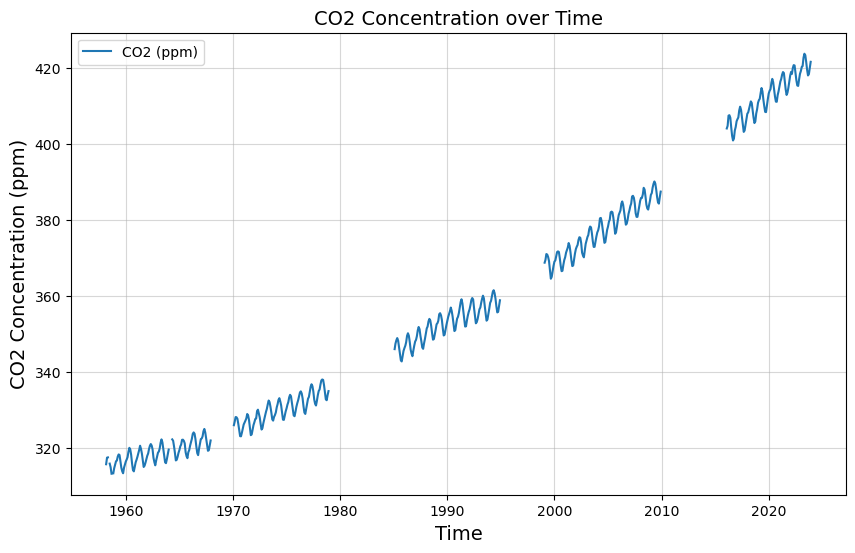

In [95]:
# load data and clean
keeling = pd.read_csv("data/keeling_curve_monthly.csv") # opening data
display(keeling) # displayed data so I can get an idea of what the headers are, what the data looks like, what it is using for NaN values
datetime = pd.to_datetime(keeling["time"]) # converting time series into datetime objects

# your code for plotting
fig, ax = plt.subplots(figsize = (10,6)) # another blank plot
ax.plot(datetime, keeling["CO2"], label = "CO2 (ppm)") # plotting CO2 against time to get an idea of the trends and what the data looks like
ax.grid(alpha = 0.5) # adding a grid
ax.set_xlabel("Time", fontsize = 14) # adding x-axis labels
ax.set_ylabel("CO2 Concentration (ppm)", fontsize = 14) # adding y-axis labels
ax.set_title("CO2 Concentration over Time", fontsize = 14) # adding a title
ax.legend() # adding a legend

In [96]:
grader.check("Question 1, Part 4")

Question 1, Part 4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Part 2: 1-D Interpolate Missing Data (20 minutes)
Oh no, Todd strikes again! It looks like Kathy's cat sat on her computer before she uploaded the data to GitHub :( 

<img src = "https://i.ibb.co/7r2hcLZ/IMG-3273-2.jpg" width = 250>

1) There are missing values for certain years within the dataset. What are the missing values represented by? Write your answer in a comment in the solution cell. 

2) Perform 1D interpolation using pandas `interpolate()` on the "CO2" column of `keeling`. Create a new column in your `keeling` dataframe named "filled" to place your interpolated values. 

3) Create a plot of your new time series with interpolated values. By default, the interpolation method is _linear_. Experiment with different methods by checking the [documentaion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html). 
How does choosing different methods impact your interpretation? Write your answer in a comment in the solution cell. 

In [97]:
## response to step 1: the missing values are represented by NaN values it looks like.

## response to step 3: 

# your code for interpolation

# your code for plotting

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Reflection questions (5 minutes)

The purpose of the reflection is to inform us as instructors about students comfort level with course content. We use these answers to inform how we spend class time and design coursework in subsequent weeks. This question is graded for completeness, so please answer each question in the text box below. Be concise in your answers (max. 2 sentences). 

1) What do you feel you excelled at in this exercise? Why?

2) What did you struggle with most in the exercise? Why?

3) Is there any section of the question that you did not complete? If so, briefly describe why and the section you spent the most time on. 

4) Is there any topic you feel we need to revisit or review in class? Why?

1) We felt solid about performing linear regressions and plotting them on the graph. 

2) We (mostly Liam) struggled with figuring out the syntax for interpolation - but we (he) also didn't have much time to work on it because we (he) was a little behind.

3) We weren't able to complete part 2 of question 3. There wasn't anything in particular that we were stuck on throughout the activity, it was just a lot of small syntax errors and slow progress because of that.

4) Not in particular!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [99]:
grader.check_all()

Question 1, Part 1 results: All test cases passed!

Question 1, Part 2 results: All test cases passed!

Question 1, Part 4 results: All test cases passed!